<a href="https://colab.research.google.com/github/ferrarimarlon/BERT-LLM/blob/main/BERTQA_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q&A com modelo LLM fine tuning

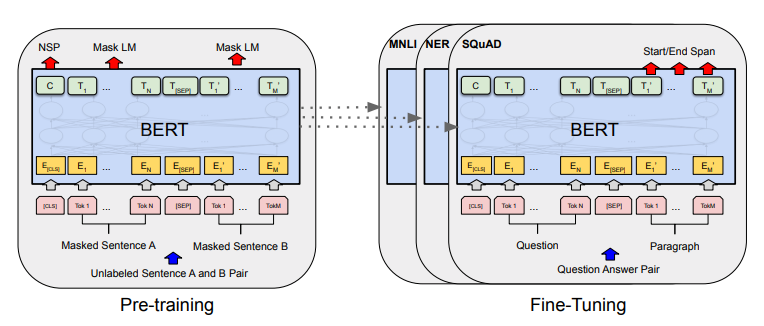

### LLMs BERT:
Demonstração: https://huggingface.co/ferrarimarlon/nietzscheLLM


BERTimbau: https://huggingface.co/neuralmind/bert-base-portuguese-cased

## LLM com Fine Tuning
https://huggingface.co/pierreguillou/bert-base-cased-squad-v1.1-portuguese

In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

#Model
model = BertForQuestionAnswering.from_pretrained(
    'pierreguillou/bert-base-cased-squad-v1.1-portuguese'
    )

#Tokenizer
tokenizer = BertTokenizer.from_pretrained(
    'pierreguillou/bert-base-cased-squad-v1.1-portuguese'
    )


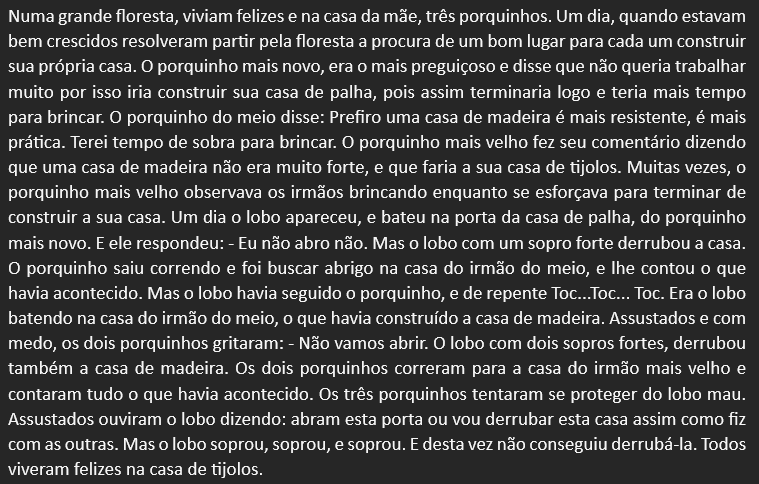
https://www.livrosdigitais.org.br/exportar_pdf/37774EMSBI3E8N

In [ ]:
pergunta = '''Qual era a casa do porquinho mais novo?'''

trecho = '''
Numa grande floresta, viviam felizes e na casa da mãe, três porquinhos. Um dia, quando estavam bem crescidos resolveram partir pela floresta a procura de um bom lugar para cada um construir sua própria casa. O porquinho mais novo, era o mais preguiçoso e disse que não queria trabalhar muito por isso iria construir sua casa de palha, pois assim terminaria logo e teria mais tempo para brincar. O porquinho do meio disse: Prefiro uma casa de madeira é mais resistente, é mais prática. Terei tempo de sobra para brincar. O porquinho mais velho fez seu comentário dizendo que uma casa de madeira não era muito forte, e que faria a sua casa de tijolos. Muitas vezes, o porquinho mais velho observava os irmãos brincando enquanto se esforçava para terminar de construir a sua casa. Um dia o lobo apareceu, e bateu na porta da casa de palha, do porquinho mais novo. E ele respondeu: - Eu não abro não. Mas o lobo com um sopro forte derrubou a casa. O porquinho saiu correndo e foi buscar abrigo na casa do irmão do meio, e lhe contou o que havia acontecido. Mas o lobo havia seguido o porquinho, e de repente Toc...Toc... Toc. Era o lobo batendo na casa do irmão do meio, o que havia construído a casa de madeira. Assustados e com medo, os dois porquinhos gritaram: - Não vamos abrir. O lobo com dois sopros fortes, derrubou também a casa de madeira. Os dois porquinhos correram para a casa do irmão mais velho e contaram tudo o que havia acontecido. Os três porquinhos tentaram se proteger do lobo mau. Assustados ouviram o lobo dizendo: abram esta porta ou vou derrubar esta casa assim como fiz com as outras. Mas o lobo soprou, soprou, e soprou. E desta vez não conseguiu derrubá-la. Todos viveram felizes na casa de tijolos.
'''

In [ ]:
input_ids = tokenizer.encode(pergunta, trecho)
input_ids[:12]

In [ ]:
tokenizer.decode(input_ids[0:12])

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(tokens[:20])

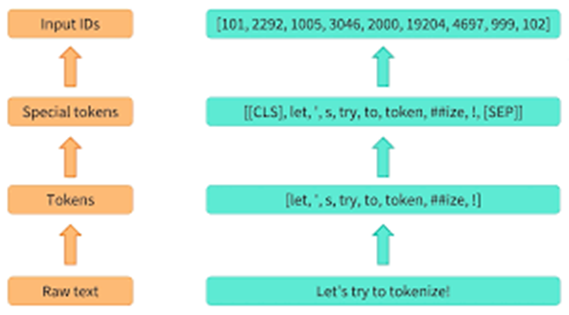

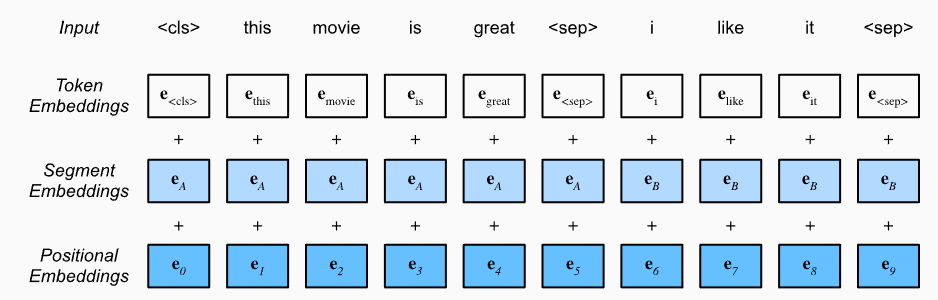

In [ ]:
# cria o segment embedding: 0 para a pergunta e 1 para o contexto (trecho)
indice_sep = tokens.index('[SEP]')
# de 0 até a posição do SEP com 0s
segmento_pergunta = [0 for i in range(indice_sep+1)]
# a partir do SEP com preenche 1
segmento_contexto = [1 for i in range(indice_sep+1,len(tokens))]
token_type_ids = segmento_pergunta + segmento_contexto
print(token_type_ids)

In [ ]:
token_embeddings = input_ids
segment_embedding = token_type_ids
tokens = tokenizer.convert_ids_to_tokens(token_embeddings)

In [ ]:
output = model(input_ids=torch.tensor([token_embeddings]), token_type_ids=torch.tensor([segment_embedding]))

In [ ]:
start_index = output.start_logits.argmax()
end_index = output.end_logits.argmax()

answer = ' '.join(tokens[start_index:end_index+1])
answer

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

In [ ]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = output.start_logits.detach().numpy().flatten()[start_index-10:end_index+10]
e_scores = output.end_logits.detach().numpy().flatten()[start_index-10:end_index+10]
tokens_viz = tokens[start_index-10:end_index+10]

In [ ]:
import pandas as pd

scores = []
for (i, token_label) in enumerate(tokens_viz):

    scores.append({'token_label': token_label,
                   'score': s_scores[i],
                   'marker': 'start'})

    scores.append({'token_label': token_label,
                   'score': e_scores[i],
                   'marker': 'end'})

df = pd.DataFrame(scores)
df.head()

In [ ]:
g = sns.catplot(x="token_label", y="score", hue="marker", data=df,
                kind="bar", height=6, aspect=4)

# Turn the xlabels vertical.
g.set_xticklabels(g.ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
g.ax.grid(True)

In [ ]:
# pega todo o contexto entre a maior probabilidade de iniciar e a de finalizar a frase
tokens[start_index:end_index+1]

### Referências
1. https://mccormickml.com/2020/03/10/question-answering-with-a-fine-tuned-BERT/
2. https://www.kaggle.com/code/arunmohan003/question-answering-using-bert
3. https://huggingface.co/docs/transformers/model_doc/bert?highlight=bertforquestionanswering#transformers.BertForQuestionAnswering